In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import tensorflow as tf
import os

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from libs.commpy_mod import SISOFlatChannel

from files_01_detection.const_mod import generate_symbols, Model
from files_01_detection.const_analyzer import plot_decision_boundary, theoretical_error, ser, plot_confusion_matrix, plot_symbols
 
%matplotlib inline

2023-06-05 13:42:31.704255: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-05 13:42:31.704280: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-05 13:42:31.742688: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-05 13:42:32.558836: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-05 13:42:32.558948: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

In [2]:
total_num_symbols  = 1000    # Number of transmitted symbols to be used for training and test
train_fraction = 0.4 # Fraction of whole data to be used for training (the remaining is for testing)
code_rate    = 1       # Rate of the used code
Es           = 1       # Average symbol energy
Mod = 'QAM'
channel_type = 'awgn' # 'awgn' or 'crazy'
M            = [16]      # QAM modulation

In [3]:
x_out = []
y_out = []
symbs = []

In [4]:
x_out.append(np.fromfile('Random_Data/teste/x_rand.dat', dtype=np.dtype('float64')).reshape((-1,3)))
y_out.append(np.fromfile('Random_Data/teste/y_rand.dat', dtype=np.dtype('float64')))
symbs.append(np.fromfile('Random_Data/teste/symb.dat', dtype=np.dtype('complex128')).reshape((1,-1)))

In [10]:
# Generate dataset
# Train
train_size = int(train_fraction*total_num_symbols) #data used for training
X_train = []
y_train = []
X_test = []
y_test = []
for i in range(len(M)):
    y_train.append(y_out[i][:train_size])
    X_train.append(x_out[i][:train_size])

    # Test
    y_test.append(y_out[i][train_size:])
    X_test.append(x_out[i][train_size:])

    #scaler = StandardScaler()
    #scaler.fit(X_train[i])  # Don't cheat - fit only on training data
    #X_train[i] = scaler.transform(X_train[i])
    #X_test[i] = scaler.transform(X_test[i])


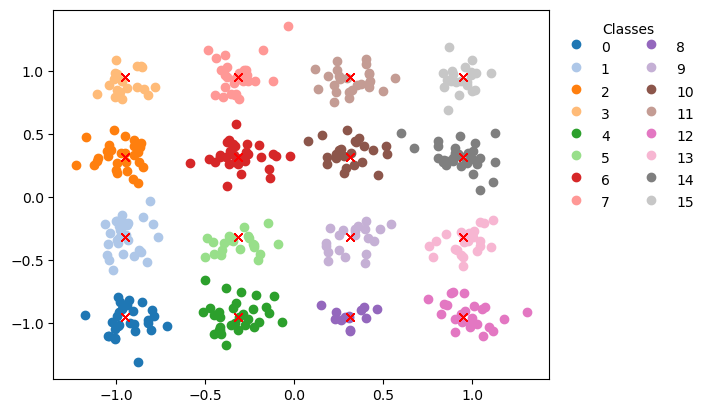

In [11]:
for i in range(len(M)):
    plot_symbols(X_train[i], y_train[i], M[i], symbs[i])